In [398]:
import numpy as np
import tensorflow.compat.v1 as tf
from tensorflow.keras import datasets, layers, models
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import SpectralEmbedding
from sklearn import metrics

tf.disable_v2_behavior()

In [399]:
# File Names
load_pre = '../'
bases_name = 'bases.npy'
alpha_name = 'batch_alpha.npy'

In [400]:
# Get filter size
F = np.load(load_pre + bases_name)

### Spectral Embedding

In [401]:
components =16
embedding = SpectralEmbedding(n_components=components)
F_embed = embedding.fit_transform(F)
print(F.shape)
print(F_embed.shape)

(256, 64)
(256, 16)


In [402]:
data = np.concatenate((F, F_embed), axis = 1)
mask = np.random.rand(len(data)) < 0.9

# load data
train_data = data[mask]
test_data = data[~mask]

#separate train data
train_x = train_data[:, F.shape[1]:]
train_y = train_data[:, :F.shape[1]]

# #separate test data
test_x = test_data[:, F.shape[1]:]
test_y = test_data[:, :F.shape[1]]
(train_x.shape)

(226, 16)

In [405]:
model = models.Sequential()
# model.add(tf.keras.Input(shape=(16,)))
model.add(layers.Dense(64, activation='relu', input_shape=(components,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))


# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
model.summary()

model.compile(optimizer='adam', loss='mse')
print(model.optimizer.get_config())
history = model.fit(train_x, train_y, epochs=150, shuffle=True, validation_data=(test_x, test_y))

Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_364 (Dense)            (None, 64)                1088      
_________________________________________________________________
dense_365 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_366 (Dense)            (None, 64)                4160      
Total params: 9,408
Trainable params: 9,408
Non-trainable params: 0
_________________________________________________________________
{'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Train on 226 samples, validate on 30 samples
Epoch 1/150
226/226 [==============================] - 3s 11ms/sample - loss: 0.0156 - val_loss: 0.0156
Epoch 2/150
226/226 [==============================] - 0s 427us/sample - loss: 0.0156 - val_loss: 0.0156
Epo

226/226 [==============================] - 0s 398us/sample - loss: 0.0115 - val_loss: 0.0124
Epoch 70/150
226/226 [==============================] - 0s 412us/sample - loss: 0.0115 - val_loss: 0.0124
Epoch 71/150
226/226 [==============================] - 0s 413us/sample - loss: 0.0115 - val_loss: 0.0124
Epoch 72/150
226/226 [==============================] - 0s 462us/sample - loss: 0.0115 - val_loss: 0.0124
Epoch 73/150
226/226 [==============================] - 0s 463us/sample - loss: 0.0115 - val_loss: 0.0124
Epoch 74/150
226/226 [==============================] - 0s 436us/sample - loss: 0.0115 - val_loss: 0.0124
Epoch 75/150
226/226 [==============================] - 0s 417us/sample - loss: 0.0115 - val_loss: 0.0124
Epoch 76/150
226/226 [==============================] - 0s 410us/sample - loss: 0.0115 - val_loss: 0.0124
Epoch 77/150
226/226 [==============================] - 0s 413us/sample - loss: 0.0115 - val_loss: 0.0124
Epoch 78/150
226/226 [==============================] - 0s 

Epoch 146/150
226/226 [==============================] - 0s 476us/sample - loss: 0.0110 - val_loss: 0.0121
Epoch 147/150
226/226 [==============================] - 0s 424us/sample - loss: 0.0110 - val_loss: 0.0121
Epoch 148/150
226/226 [==============================] - 0s 407us/sample - loss: 0.0110 - val_loss: 0.0121
Epoch 149/150
226/226 [==============================] - 0s 389us/sample - loss: 0.0109 - val_loss: 0.0120
Epoch 150/150
226/226 [==============================] - 0s 418us/sample - loss: 0.0109 - val_loss: 0.0120


In [406]:
test_loss = model.evaluate(test_x, test_y, verbose=2)
print(test_loss)

0.012042516842484474


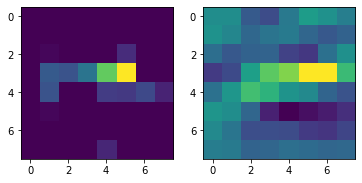

In [407]:
predictions = model.predict(test_x)

feature = 3

plt.subplot(1,2,1)
plt.imshow(predictions[feature, :].reshape([k_sz, k_sz]))
plt.subplot(1,2,2)
plt.imshow(test_y[feature, :].reshape([k_sz, k_sz]))